In [ ]:
import csv
import numpy as np
from mlxtend.data import loadlocal_mnist
import platform
import random
from sklearn import preprocessing
import cv2

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib.pyplot import figure


In [ ]:
file = open('sample_data/mnist_train_small.csv')
reader = csv.reader(file)

# load data 
lines = []
for row in reader:
  newline = []
  for element in row:
    newline.append(element)
  lines.append(newline)

lines = np.array([ [float(x) for x in line] for line in lines])
lines_labels = lines[0:, 0]
lines_labels = np.reshape( lines_labels , ( np.shape(lines_labels)[0] , 1 ) )
lines = lines[0:,1:]

# get sample
#get sample from data
n,d = np.shape( lines )
print('data loaded successfuly:', n, d)

# sample_size = 8000
# random_nums = set()
# sample_data = []

# for i in range(sample_size):
#   random_index = random.randint(0, n - 1)
#   sample_data.append(lines[random_index])  

data loaded successfuly: 20000 784


In [ ]:
len(lines_labels)

20000

In [ ]:
print(len(lines))
# print(np.shape(sample_data))
print(np.shape(lines_labels))

20000
(20000, 1)


In [ ]:
# Once centroids are formed, 

from google.colab.patches import cv2_imshow
import math


def show_images ( flattened_images , is_normalized ):
# takes an n x d array, where 
# n is number of images and 
# d is the flattened dimension of each image
  if is_normalized:
    print('normalized value. Needs to be converted.')
    flattened_images *= 255

  N = int( math.sqrt ( np.shape(flattened_images)[1] ) )  
  for flattened_image in flattened_images:
    reshaped_image = np.reshape( flattened_image, (N,N) )
    cv2_imshow(reshaped_image)

def show_image ( flattened_image ):
  flattened_image = np.reshape( flattened_image , (784,1) )
  n, d = np.shape(flattened_image)
  sq_dim = int (math.sqrt (n))
  digit_reshaped = np.reshape(digit, (sq_dim , sq_dim))

  cv2_imshow(digit_reshaped)

inmages = lines[:20]
show_images (inmages, False )
    

# flattened_images = lines
# print(np.shape(flattened_images))

# # get value of N
# N = math.sqrt ( np.shape(lines)[1] )
# print(N) 



In [ ]:
# # Q4: normalize lines so that they contain values between 0 and 1 only

# print(np.shape(lines))

# # reshaped for compatibility with library function
# lines_normalized = np.array (  [ preprocessing.normalize( np.reshape(line , (-1,1)) ) for line in lines ]  )
# print(np.shape(lines_normalized))

# # un-reshaped for compatibility with Shohan's functions
# lines_normalized = np.reshape(lines_normalized, (20000, 784))
# print(np.shape(lines_normalized))

# # check that all values have been normalized (first 10 values will do)
# for line_normalized in lines_normalized[:10]:
#   print(line_normalized)

In [ ]:
# begin kmeans.
print(np.shape(lines))
n,d = np.shape(lines)

# since we want to recognize 10 types of symbol...
k=10

def initialize_centroids_simple( indata, d, k ):
  cent = np.array([[0 for _ in range(d)] for _ in range(k)])
  clustaff = np.array([[lines[i], None] for i in range(n)])
  
  all_indexes = list(np.arange(0,n))
  indexes = random.sample (all_indexes, k) 
  print('\nThese', k, 'radomly selected indexes will be initialized as the first centroids:', indexes)

  for i, index in enumerate(indexes):
    print('point number', index, 'will be assigned as centroid number', i)
    temp_point = indata[index]
    for j in range(d):
      cent[i][j] = indata[i][j] 
  return cent, clustaff, indexes

def initialize_centroids(data, dimension, k):
    centroids = np.zeros ((k,dimension))
    # centroids = [[0 for _ in range(dimension)] for _ in range(k)]
    max_feature_vals = [0 for _ in range(dimension)]
    min_feature_vals = [float('inf') for _ in range(dimension)]
    for point in data:
        for i in range(dimension):
            max_feature_vals[i] = max(max_feature_vals[i], point[i ])
            min_feature_vals[i] = min(min_feature_vals[i], point[i ])
    for i in range(dimension):
        min_feature_val = min_feature_vals[i]
        max_feature_val = max_feature_vals[i]
        diff = max_feature_val - min_feature_val
        for j in range(k):
            centroids[j][i] = min_feature_val + diff * random.uniform(1e-5, 1)
    print(type(centroids))
    return centroids, True

(20000, 784)


In [ ]:
centroids_advanced, first_time  = initialize_centroids (lines, d, k)
print(np.shape(centroids_advanced))
show_images(centroids_advanced, False)

<class 'numpy.ndarray'>
(10, 784)


In [ ]:
from scipy.spatial import distance

def reaffiliate_everyone( indata, clustaff, cents, k, first_run ):
  print('reaffiliating everyone...')

  n,d = np.shape (indata)

  if first_run == True:  
    # ignore clustaff input and init clustaff from scratch
    clustaff = np.array([[indata[i], None] for i in range(n)])
    print('running reaffiliation program for the first time. Initializing clustaff from scratch...')
  # else:
    # use the clustaff tht was passed into this function

  # after each reaffiliation, we'll also keep count of points per cluster
  cpcount = [0 for _ in range(k)]

  # stores whether at least one point was reaffliated. So, before reaffiliation, this value will be zero.
  flag = 0

  # counts the number of points that were reaffiliated. So, before reaffiliation, this value will also be zero.
  reaff_count = 0

  print('flag before mass reaffiliation: ', flag)
  for thispoint_index in range (len(indata)):
    # print(thispoint_index)
    thispoint = indata[thispoint_index]
    distances = []

    # find distances from thispoint to all centroids
    for cent in cents:
      distances.append ( distance.euclidean(thispoint, cent) )

    # find the smallest distance, and corresponding cluster number. 
    closest_distance = np.amin(distances)
    min_dist_index = distances.index (closest_distance)
    # print('thispoints closest centroid is centroid number ', min_dist_index)

    # thispoint will be affiliated with cluster number min_dist_index; 
    # but only if min_dist_index is different from thispoint's existing cluster number.
    if clustaff[thispoint_index][1] != min_dist_index:
      flag = 1
      reaff_count += 1
      clustaff[thispoint_index][1] = min_dist_index
      
    # else:
      # don't bother reaffiliating this point. Flag remains == 0.
      # print('this point will NOT be reaffiliated.')


    # once reaffilliation is done, count this point.
    cpcount[clustaff[thispoint_index][1]] += 1
  print('flag after mass reaffiliation: ', flag, 'which means...')

  if flag == 1:
    print('At least one point was reaffiliated.')
  elif flag == 0:
    print('No points were reaffiliated. Kmeans has finally converged.')
  
  print(cpcount)
  print('number of points reaffiliated:', reaff_count )

      
  return clustaff, cpcount, flag, False, reaff_count

In [ ]:
print(first_time)
print(flag)

True


NameError: ignored

In [ ]:
# test the mass reaffiliation program
cluster_affiliations = []
cluster_affiliations, cluster_point_count, flag, first_time, counter = reaffiliate_everyone( lines , cluster_affiliations, centroids_advanced, k, first_time )
print('First time? ', first_time )
print('flag:', flag)
print('number of points reaffiliated(global):', counter)

reaffiliating everyone...
running reaffiliation program for the first time. Initializing clustaff from scratch...
flag before mass reaffiliation:  0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  # Remove the CWD from sys.path while we load stuff.


flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[3272, 5790, 104, 1, 4023, 184, 766, 5836, 24, 0]
number of points reaffiliated: 20000
First time?  False
flag: 1
number of points reaffiliated(global): 20000


In [ ]:
#check that every point was re-affiliated (and that no point is reaffiliated to cluster number None).

for affiliation in cluster_affiliations:
  if affiliation[1] == None:
    print(affiliation[1])

In [ ]:
def recompute_centroids( indata, clustaff, cpcount, k ):
  global cent
  print('recomputing centroids...')
  n,d = np.shape(indata)

  cent =  np.array([[0 for _ in range(d)] for _ in range(k)] )
  print(np.shape(cent))

  # print('before add:', cent)
  for i, aff in enumerate( clustaff ):
    # find out which cluster this point belongs to. Call it c.
    c = aff[1]
    # print('point number', i , 'belongs to cluster number', c)

    # add this point's coordinates to the cth centroid
    cent[c] = np.add ( cent[c], aff[0] ) 
    # print(cent[c])
  

  for i in range(k):
    # divide each centroid's coordinates 
    # with the number of points that belong to that centroid
    if cpcount[i] ==0:
      continue
    cent[i] = np.divide( cent[i], cpcount[i])
    
  # print('after recomputing:')
  # for centroid in cent:
  #   print(centroid)
  # print('done\n')
  print('done')

  return cent

In [ ]:
# test recompute_centroids
centroids_advanced = recompute_centroids ( lines, cluster_affiliations, cluster_point_count, k )
show_images(centroids_advanced, False)
flag

recomputing centroids...
(10, 784)
done


1

In [ ]:
while flag or counter > 5:
  cluster_affiliations, cluster_point_count, flag, first_time, counter = reaffiliate_everyone( lines , cluster_affiliations, centroids_advanced, k, first_time )
  centroids_advanced = recompute_centroids ( lines, cluster_affiliations, cluster_point_count, k )
  show_images(centroids_advanced, False)

reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2878, 4264, 953, 24, 2948, 1230, 1841, 5178, 560, 124]
number of points reaffiliated: 10108
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2874, 3662, 1443, 347, 2798, 1287, 1892, 4072, 787, 838]
number of points reaffiliated: 4860
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2830, 3015, 1475, 947, 2623, 1341, 2030, 3197, 942, 1600]
number of points reaffiliated: 3606
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2745, 2596, 1583, 1194, 2575, 1432, 2118, 2602, 1084, 2071]
number of points reaffiliated: 2274
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2681, 2411, 1716, 1303, 2555, 1499, 2129, 2169, 1242, 2295]
number of points reaffiliated: 1736
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2639, 2302, 1790, 1362, 2562, 1599, 2071, 1868, 1387, 2420]
number of points reaffiliated: 1423
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2635, 2232, 1815, 1408, 2588, 1712, 2007, 1718, 1481, 2404]
number of points reaffiliated: 1028
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2641, 2188, 1814, 1463, 2636, 1790, 1938, 1634, 1538, 2358]
number of points reaffiliated: 762
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2668, 2178, 1807, 1496, 2678, 1840, 1888, 1599, 1563, 2283]
number of points reaffiliated: 518
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2680, 2184, 1803, 1528, 2719, 1866, 1837, 1570, 1588, 2225]
number of points reaffiliated: 422
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2695, 2180, 1806, 1556, 2760, 1874, 1810, 1547, 1592, 2180]
number of points reaffiliated: 334
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2712, 2175, 1816, 1577, 2783, 1877, 1791, 1523, 1598, 2148]
number of points reaffiliated: 248
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2733, 2172, 1832, 1583, 2787, 1882, 1782, 1510, 1607, 2112]
number of points reaffiliated: 190
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2750, 2161, 1857, 1590, 2787, 1887, 1779, 1506, 1610, 2073]
number of points reaffiliated: 158
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2775, 2165, 1872, 1582, 2789, 1889, 1770, 1507, 1615, 2036]
number of points reaffiliated: 115
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2791, 2168, 1887, 1578, 2799, 1889, 1759, 1511, 1620, 1998]
number of points reaffiliated: 100
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2802, 2166, 1897, 1576, 2807, 1892, 1756, 1512, 1622, 1970]
number of points reaffiliated: 81
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2811, 2167, 1906, 1572, 2814, 1896, 1754, 1516, 1623, 1941]
number of points reaffiliated: 66
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2814, 2167, 1912, 1569, 2815, 1898, 1759, 1520, 1626, 1920]
number of points reaffiliated: 48
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2816, 2165, 1923, 1567, 2812, 1899, 1762, 1522, 1627, 1907]
number of points reaffiliated: 38
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2815, 2165, 1929, 1567, 2813, 1900, 1764, 1520, 1628, 1899]
number of points reaffiliated: 31
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2815, 2172, 1931, 1568, 2813, 1898, 1762, 1522, 1630, 1889]
number of points reaffiliated: 32
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2815, 2172, 1932, 1571, 2811, 1898, 1762, 1527, 1632, 1880]
number of points reaffiliated: 30
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2816, 2171, 1934, 1569, 2810, 1898, 1762, 1528, 1635, 1877]
number of points reaffiliated: 22
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2816, 2168, 1939, 1569, 2807, 1897, 1763, 1532, 1635, 1874]
number of points reaffiliated: 22
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2818, 2162, 1942, 1570, 2806, 1897, 1765, 1535, 1635, 1870]
number of points reaffiliated: 23
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2819, 2161, 1949, 1569, 2801, 1898, 1766, 1539, 1634, 1864]
number of points reaffiliated: 30
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2819, 2152, 1952, 1568, 2800, 1899, 1775, 1543, 1634, 1858]
number of points reaffiliated: 26
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2819, 2143, 1955, 1568, 2799, 1898, 1783, 1544, 1634, 1857]
number of points reaffiliated: 21
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2818, 2138, 1961, 1568, 2796, 1897, 1790, 1545, 1634, 1853]
number of points reaffiliated: 27
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2815, 2141, 1965, 1566, 2794, 1896, 1796, 1544, 1634, 1849]
number of points reaffiliated: 33
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2816, 2142, 1965, 1562, 2791, 1895, 1807, 1543, 1634, 1845]
number of points reaffiliated: 31
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2816, 2151, 1966, 1559, 2787, 1894, 1814, 1540, 1632, 1841]
number of points reaffiliated: 33
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2817, 2152, 1965, 1557, 2785, 1893, 1823, 1537, 1632, 1839]
number of points reaffiliated: 30
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2819, 2157, 1962, 1558, 2778, 1892, 1830, 1535, 1632, 1837]
number of points reaffiliated: 32
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2817, 2161, 1958, 1558, 2778, 1890, 1840, 1532, 1631, 1835]
number of points reaffiliated: 38
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2817, 2164, 1954, 1558, 2772, 1891, 1849, 1533, 1632, 1830]
number of points reaffiliated: 35
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2815, 2159, 1951, 1559, 2773, 1891, 1862, 1534, 1632, 1824]
number of points reaffiliated: 42
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2816, 2160, 1951, 1556, 2770, 1889, 1870, 1533, 1631, 1824]
number of points reaffiliated: 41
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2814, 2152, 1954, 1554, 2769, 1889, 1883, 1533, 1629, 1823]
number of points reaffiliated: 39
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2809, 2142, 1953, 1555, 2770, 1887, 1902, 1534, 1627, 1821]
number of points reaffiliated: 44
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2808, 2146, 1950, 1554, 2766, 1886, 1909, 1534, 1628, 1819]
number of points reaffiliated: 47
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2810, 2147, 1948, 1554, 2765, 1883, 1916, 1532, 1630, 1815]
number of points reaffiliated: 46
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2809, 2147, 1946, 1556, 2760, 1882, 1926, 1531, 1630, 1813]
number of points reaffiliated: 53
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2807, 2154, 1941, 1557, 2757, 1884, 1930, 1532, 1629, 1809]
number of points reaffiliated: 48
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2800, 2156, 1937, 1559, 2755, 1884, 1941, 1531, 1629, 1808]
number of points reaffiliated: 59
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2798, 2156, 1929, 1558, 2753, 1883, 1962, 1529, 1627, 1805]
number of points reaffiliated: 65
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2795, 2150, 1920, 1558, 2748, 1883, 1990, 1528, 1624, 1804]
number of points reaffiliated: 72
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2794, 2142, 1911, 1560, 2739, 1882, 2018, 1526, 1623, 1805]
number of points reaffiliated: 77
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2795, 2137, 1898, 1563, 2727, 1878, 2055, 1523, 1620, 1804]
number of points reaffiliated: 100
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2800, 2133, 1888, 1565, 2714, 1872, 2089, 1516, 1617, 1806]
number of points reaffiliated: 120
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2804, 2124, 1887, 1568, 2705, 1870, 2115, 1508, 1614, 1805]
number of points reaffiliated: 104
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2809, 2105, 1888, 1568, 2699, 1863, 2148, 1499, 1612, 1809]
number of points reaffiliated: 117
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2805, 2097, 1890, 1568, 2696, 1855, 2176, 1487, 1612, 1814]
number of points reaffiliated: 134
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2802, 2087, 1893, 1569, 2690, 1851, 2209, 1474, 1612, 1813]
number of points reaffiliated: 127
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2802, 2094, 1911, 1570, 2681, 1844, 2213, 1462, 1608, 1815]
number of points reaffiliated: 141
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2807, 2077, 1926, 1572, 2672, 1838, 2228, 1449, 1610, 1821]
number of points reaffiliated: 150
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2809, 2061, 1939, 1572, 2666, 1830, 2249, 1435, 1610, 1829]
number of points reaffiliated: 137
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2802, 2057, 1960, 1579, 2660, 1823, 2249, 1423, 1612, 1835]
number of points reaffiliated: 161
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2800, 2033, 1988, 1579, 2660, 1817, 2255, 1416, 1613, 1839]
number of points reaffiliated: 139
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2801, 2016, 2029, 1581, 2659, 1814, 2240, 1408, 1611, 1841]
number of points reaffiliated: 154
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2800, 2002, 2064, 1578, 2656, 1808, 2233, 1405, 1613, 1841]
number of points reaffiliated: 134
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2805, 1985, 2088, 1579, 2658, 1806, 2223, 1399, 1613, 1844]
number of points reaffiliated: 121
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2801, 1975, 2107, 1580, 2661, 1806, 2212, 1396, 1612, 1850]
number of points reaffiliated: 86
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2798, 1978, 2124, 1586, 2664, 1800, 2192, 1392, 1612, 1854]
number of points reaffiliated: 75
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2795, 1973, 2140, 1587, 2664, 1798, 2179, 1391, 1617, 1856]
number of points reaffiliated: 85
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2789, 1979, 2153, 1586, 2663, 1794, 2164, 1390, 1624, 1858]
number of points reaffiliated: 69
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2787, 1985, 2164, 1588, 2665, 1789, 2145, 1388, 1627, 1862]
number of points reaffiliated: 58
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2789, 1980, 2187, 1588, 2665, 1787, 2126, 1387, 1629, 1862]
number of points reaffiliated: 64
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2789, 1969, 2208, 1588, 2669, 1784, 2115, 1385, 1630, 1863]
number of points reaffiliated: 64
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2789, 1966, 2218, 1591, 2672, 1776, 2108, 1385, 1629, 1866]
number of points reaffiliated: 54
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2789, 1959, 2226, 1592, 2677, 1767, 2109, 1384, 1629, 1868]
number of points reaffiliated: 59
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2790, 1956, 2237, 1591, 2681, 1763, 2100, 1383, 1629, 1870]
number of points reaffiliated: 50
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2792, 1958, 2248, 1593, 2679, 1758, 2091, 1382, 1628, 1871]
number of points reaffiliated: 51
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2797, 1957, 2252, 1595, 2682, 1746, 2090, 1380, 1628, 1873]
number of points reaffiliated: 50
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2801, 1962, 2259, 1593, 2682, 1738, 2087, 1379, 1629, 1870]
number of points reaffiliated: 59
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2799, 1964, 2271, 1592, 2692, 1730, 2078, 1381, 1626, 1867]
number of points reaffiliated: 63
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2798, 1952, 2281, 1591, 2703, 1725, 2078, 1383, 1624, 1865]
number of points reaffiliated: 56
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2795, 1940, 2284, 1590, 2718, 1723, 2078, 1384, 1621, 1867]
number of points reaffiliated: 66
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2795, 1942, 2290, 1583, 2727, 1714, 2077, 1388, 1616, 1868]
number of points reaffiliated: 55
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2793, 1939, 2295, 1580, 2737, 1709, 2075, 1390, 1613, 1869]
number of points reaffiliated: 46
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2791, 1934, 2296, 1581, 2747, 1704, 2074, 1393, 1612, 1868]
number of points reaffiliated: 40
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2788, 1931, 2299, 1579, 2755, 1697, 2075, 1399, 1610, 1867]
number of points reaffiliated: 50
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2785, 1933, 2304, 1579, 2770, 1689, 2070, 1399, 1607, 1864]
number of points reaffiliated: 41
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2789, 1937, 2308, 1578, 2773, 1677, 2069, 1402, 1605, 1862]
number of points reaffiliated: 40
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2790, 1943, 2313, 1576, 2780, 1663, 2071, 1403, 1599, 1862]
number of points reaffiliated: 62
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2795, 1946, 2316, 1568, 2788, 1652, 2075, 1403, 1597, 1860]
number of points reaffiliated: 64
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2798, 1938, 2320, 1567, 2807, 1642, 2070, 1404, 1596, 1858]
number of points reaffiliated: 66
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2806, 1931, 2322, 1563, 2823, 1636, 2063, 1405, 1596, 1855]
number of points reaffiliated: 77
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2815, 1919, 2326, 1561, 2835, 1633, 2053, 1406, 1595, 1857]
number of points reaffiliated: 64
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2822, 1912, 2333, 1559, 2841, 1631, 2041, 1412, 1592, 1857]
number of points reaffiliated: 58
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2827, 1917, 2338, 1557, 2840, 1628, 2033, 1417, 1589, 1854]
number of points reaffiliated: 58
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2832, 1919, 2340, 1555, 2842, 1622, 2024, 1423, 1586, 1857]
number of points reaffiliated: 51
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2838, 1919, 2343, 1552, 2848, 1616, 2019, 1423, 1585, 1857]
number of points reaffiliated: 57
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2838, 1920, 2347, 1549, 2860, 1612, 2012, 1423, 1581, 1858]
number of points reaffiliated: 57
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2840, 1920, 2350, 1547, 2867, 1609, 2006, 1424, 1578, 1859]
number of points reaffiliated: 54
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2841, 1915, 2355, 1543, 2877, 1605, 2001, 1429, 1575, 1859]
number of points reaffiliated: 66
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2841, 1904, 2360, 1542, 2889, 1600, 1999, 1432, 1574, 1859]
number of points reaffiliated: 62
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2841, 1898, 2363, 1543, 2907, 1592, 1994, 1437, 1570, 1855]
number of points reaffiliated: 79
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2849, 1913, 2367, 1542, 2907, 1583, 1980, 1440, 1569, 1850]
number of points reaffiliated: 61
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2854, 1919, 2375, 1544, 2911, 1573, 1970, 1437, 1568, 1849]
number of points reaffiliated: 68
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2858, 1917, 2379, 1543, 2913, 1565, 1973, 1437, 1568, 1847]
number of points reaffiliated: 51
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2866, 1916, 2385, 1546, 2912, 1554, 1967, 1441, 1568, 1845]
number of points reaffiliated: 62
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2864, 1920, 2387, 1545, 2913, 1554, 1960, 1446, 1567, 1844]
number of points reaffiliated: 45
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2865, 1924, 2392, 1545, 2916, 1544, 1954, 1450, 1566, 1844]
number of points reaffiliated: 39
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2868, 1929, 2396, 1544, 2918, 1536, 1952, 1449, 1565, 1843]
number of points reaffiliated: 44
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2870, 1937, 2397, 1544, 2918, 1533, 1949, 1449, 1563, 1840]
number of points reaffiliated: 30
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2872, 1950, 2395, 1546, 2917, 1527, 1941, 1454, 1563, 1835]
number of points reaffiliated: 37
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2873, 1960, 2399, 1548, 2916, 1523, 1931, 1457, 1562, 1831]
number of points reaffiliated: 37
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2872, 1965, 2400, 1547, 2917, 1520, 1928, 1459, 1561, 1831]
number of points reaffiliated: 24
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2874, 1966, 2404, 1547, 2915, 1517, 1924, 1463, 1560, 1830]
number of points reaffiliated: 25
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2875, 1970, 2406, 1549, 2912, 1514, 1921, 1465, 1559, 1829]
number of points reaffiliated: 25
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2876, 1966, 2409, 1550, 2910, 1513, 1919, 1468, 1559, 1830]
number of points reaffiliated: 19
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2875, 1964, 2413, 1550, 2909, 1513, 1920, 1470, 1559, 1827]
number of points reaffiliated: 10
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2875, 1960, 2417, 1550, 2909, 1513, 1920, 1472, 1559, 1825]
number of points reaffiliated: 9
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2875, 1963, 2419, 1549, 2909, 1512, 1914, 1474, 1559, 1826]
number of points reaffiliated: 9
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2875, 1962, 2420, 1550, 2909, 1511, 1912, 1476, 1559, 1826]
number of points reaffiliated: 5
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2877, 1960, 2420, 1550, 2909, 1510, 1911, 1478, 1559, 1826]
number of points reaffiliated: 7
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2878, 1960, 2420, 1549, 2910, 1507, 1912, 1479, 1558, 1827]
number of points reaffiliated: 10
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2877, 1959, 2421, 1549, 2910, 1508, 1910, 1479, 1558, 1829]
number of points reaffiliated: 7
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2878, 1956, 2423, 1548, 2912, 1508, 1910, 1479, 1557, 1829]
number of points reaffiliated: 7
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2879, 1953, 2423, 1548, 2915, 1508, 1909, 1479, 1557, 1829]
number of points reaffiliated: 5
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2880, 1952, 2423, 1548, 2916, 1508, 1908, 1479, 1557, 1829]
number of points reaffiliated: 3
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2880, 1952, 2422, 1548, 2916, 1508, 1908, 1479, 1558, 1829]
number of points reaffiliated: 1
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  0 which means...
No points were reaffiliated. Kmeans has finally converged.
[2880, 1952, 2422, 1548, 2916, 1508, 1908, 1479, 1558, 1829]
number of points reaffiliated: 0
recomputing centroids...
(10, 784)
done


### Calculate the quality of the final clusters using the following criteria:
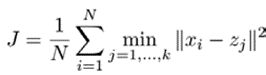

In [ ]:
#INTERNAL VALIDATION I:

import numpy.linalg as LA

def checkQuality_internal( indata, cents ):
  mindistsum = 0
  
  for thispoint in indata:

    # calculate thisdistances from one datapoint to all centroids
    tempdist = []
    for cent in cents:
      tempdist.append (  LA.norm( thispoint-cent ) **2   )
    
    # pick mindist from tempdist
    mindist = min(tempdist)

    # sum mindist into mindistsum
    mindistsum += mindist

  # ans
  return mindistsum / n

In [ ]:
print(checkQuality_internal(lines, centroids_advanced))

2547268.95555




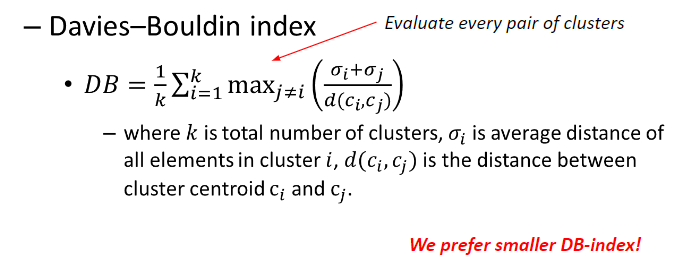

In [ ]:
# INTERNAL VALIDATION II: db index

def compute_average_intra_cluster_distances( cent, clustaff, k ):

  avg_distances = np.zeros ((k))

  # a. first, count how many points are in each cluster
  clusterpoint_counts = np.zeros(k)
  for aff in clustaff:
    point_affiliation = aff[1]
    clusterpoint_counts[point_affiliation] += 1

  # b. then, perform n sum operations 
  for i, aff in enumerate(clustaff):
    # print('checking point number', i)
    # aff = [thispoint_coordinates, c]
    thispoint_coordinates = aff[0]
    c = aff[1]
    thispoint_distance_to_centroid = distance.euclidean ( thispoint_coordinates, cent[c] )

    # print(i, 'this points distance to affiliated centroid number:', c,'. Distance:' ,thispoint_distance_to_centroid)

    # add this distance to entry number c in average_intra_cluster_distances
    avg_distances[c] = avg_distances[c] + thispoint_distance_to_centroid
    # print(avg_distances[c])

  # c. then, perform k divide operations
  for i, thiscount in enumerate(clusterpoint_counts):
    avg_distances[i] = np.divide ( avg_distances[i] , thiscount )

  return avg_distances

def db_index ( cent, clustaff, k):

  # 1. initialize and populate average intra cluster distances array
  
  average_intra_cluster_distances = compute_average_intra_cluster_distances (cent, clustaff, k)
  print('initialized and populated average intra_cluster distances:', np.shape(average_intra_cluster_distances))

  # 2. initialize and populate inter_centroid_distances array

  inter_centroid_distances = np.zeros ((k,k))
  for i in range (k):
    for j in range(k):
      inter_centroid_distances[i][j] = distance.euclidean ( cent [i], cent[j] )
  print('initialized inter_centroid_distances:', np.shape(inter_centroid_distances))

  presum_array = []
  for i in range(k):
    a_matrix = []
    for j in range(k):
      if i == j:
        continue
      #else, calculate a for (i,j)
      a = average_intra_cluster_distances[i] - average_intra_cluster_distances[j]
      a = a / inter_centroid_distances[i][j]
      a_matrix.append(a)
    
    # for current i, append max value of a into presum_array
    presum_array.append ( max(a_matrix) )

  ans = np.sum(presum_array)
  ans = ans/k
  return ans

print(db_index( centroids_advanced, cluster_affiliations, k ) )

initialized and populated average intra_cluster distances: (10,)
initialized inter_centroid_distances: (10, 10)
0.2709764605047864


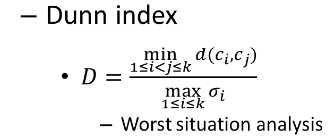

In [ ]:
# INTERNAL VALIDATION II: Dunn index



def dunn_index ( intra_cluster, k, cent ):

  # set up inter-centroid distances array

  inter_centroid_distances = np.zeros ((k,k))
  for i in range (k):
    for j in range(k):
      inter_centroid_distances[i][j] = distance.euclidean ( cent [i], cent[j] )
  print('initialized inter_centroid_distances:', np.shape(inter_centroid_distances))

  inter_i = []
  intra_i = []

  for i in range (k):
    
    # store cluster i's intra clust dist
    intra_i.append( intra_cluster[i] )

    # list i's distances to every neighbor j
    inter_j = []
    for j in range(k):
      inter_j.append(inter_centroid_distances[i][j])

    # compute i's distance to closest neighbor
    min_inter_j= min (inter_j)

    # remember i's worst inter-cluster distance
    inter_i.append ( min_inter_j )

  #compute max intra clust dist (worst case)
  intra_max = max( intra_i )

  #compute min inter clust dist (worst case)
  inter_min = max( inter_i )

  return inter_min / intra_max 

average_intra_cluster_distances = compute_average_intra_cluster_distances (centroids_advanced, cluster_affiliations, k)
print( dunn_index ( average_intra_cluster_distances, k, centroids_advanced ) )

initialized inter_centroid_distances: (10, 10)
0.0


In [ ]:
w_given = [ [] for _ in range(k) ]
for i, label in enumerate (lines_labels):
  target_cluster = int(label[0])
  w_given[ target_cluster ].append( i )

w_computed = [ [] for _ in range(k) ]
for i, affiliation in enumerate (cluster_affiliations):
  w_computed[affiliation[1]].append(int(i))

for w in w_given:
  print(w)
print('\n')

for w in w_computed:
  print(w)
  


[6, 52, 57, 73, 75, 81, 93, 107, 109, 112, 126, 152, 164, 167, 181, 182, 202, 211, 223, 227, 233, 241, 248, 271, 272, 303, 310, 314, 336, 348, 353, 357, 358, 363, 369, 373, 379, 385, 386, 390, 395, 396, 404, 417, 455, 470, 493, 501, 502, 508, 522, 545, 550, 551, 555, 567, 578, 590, 607, 609, 622, 628, 648, 651, 675, 682, 688, 703, 727, 730, 756, 768, 779, 788, 806, 810, 814, 824, 825, 844, 845, 851, 910, 934, 966, 1003, 1005, 1007, 1021, 1022, 1029, 1040, 1042, 1045, 1046, 1070, 1073, 1083, 1090, 1094, 1104, 1108, 1111, 1118, 1137, 1147, 1148, 1166, 1169, 1179, 1180, 1199, 1202, 1203, 1206, 1218, 1242, 1243, 1255, 1276, 1291, 1299, 1321, 1358, 1361, 1362, 1376, 1388, 1420, 1427, 1428, 1429, 1480, 1492, 1499, 1501, 1507, 1519, 1537, 1541, 1551, 1566, 1571, 1577, 1580, 1582, 1588, 1598, 1614, 1622, 1652, 1659, 1694, 1725, 1741, 1744, 1754, 1772, 1779, 1782, 1787, 1788, 1814, 1823, 1836, 1867, 1882, 1902, 1911, 1917, 1930, 1943, 1967, 1983, 1986, 1990, 1997, 2003, 2006, 2018, 2037, 2092, 

In [ ]:
def count_hits ( this_set, that_set ):
  hit_count = 0
  for index in this_set:
    if index in that_set:
      hit_count += 1
  return hit_count

def purity_index ( N, W_given, W_computed ):

  max_hitcounts = []

  for i in range (k):
    # target computed members of ith cluster
    computed_i = W_computed[i]

    # start storing the number of hits for cluster i
    hitcounters_i = []

    for j in range(k):
      # target actual members of jth cluster
      given_j = W_given[j]

      # count the number of common items between 
      # computed_i matches with given_i
      hitcount_j = count_hits (computed_i, given_j)
      hitcounters_i.append(hitcount_j)
    
    max_hitcounts.append ( max(hitcounters_i) )

  print('max hitcounts:', max_hitcounts )

  # compute result
  max_hitcounts_sum = sum (max_hitcounts)
  ans = max_hitcounts_sum / N

  return ans

print(purity_index ( n, w_given, w_computed) )

max hitcounts: [1038, 558, 1280, 1406, 1348, 1339, 1137, 1046, 1459, 1179]
0.5895


In [ ]:
def rand_index ():

  #indexes_1 = [list of every index in the dataset]
  indexes_1 = np.arange(n)

  #indexes_2 = [ also another duplicate list of every index in the dataset]
  indexes_2 = np.arange(n)

  tuple_combinations = unordered_combination( indexes_1, indexes_2 )

  confusion_matrix = np.zeros ( (2,2) ) 
  for tuple_combination in tuple_combinations:
    i = tuple_combination[0]
    j = tuple_combination[1]

    c_i = cluster_affiliations[i][1]
    c_j = cluster_affiliations[j][1]

    w_i = int(lines_labels[i][0])
    w_j = int(lines_labels[j][0])

    if c_i == c_j:
      if w_i == w_j:
        #TP
        confusion_matrix[0][0] += 1
      elif w_i != w_j:
        #FP
        confusion_matrix[0][1] += 1
    
    elif c_i != c_j:
      if w_i == w_j:
        #FN
        confusion_matrix[0][0] += 1
      elif w_i != w_j:
        #TN
        confusion_matrix[0][1] += 1

In [ ]:
# Template: 3D plotting using matplotllib

#plot a 2D line on the ground
x = np.array(
    [[1,1,1], 
     [2,2,2],
     [3,3,3]
     ])

figure(figsize=(10, 8), dpi=80)
axes=plot.axes(projection="3d")
axes.scatter( x[0:,0] , x[0:,1], x[0:,2] )

# ready. Now apply this to 3D array representation of 784-dimensional images

NameError: ignored

<Figure size 800x640 with 0 Axes>

In [ ]:
# prepare tsne sample
tsample = []
for _ in range(1000):
  random_index = random.randint(0, 20000 - 1)
  tsample.append(lines[random_index])

tsample = np.array(tsample)
print(np.shape(tsample))

(1000, 784)


In [ ]:
# so which sample datapoint belongs to which centroid_advanced? We'll need that for color-coding the sample 3d plot.

# these 1000 datapoints will be affiliated for the first time. Therefore...
first_time = True
# Doesn't matter what cluster_affiliation's value is. Since first_time = True, Clustaff will be initialized from scratch anyway. 

test_affiliations, digit_detection_count, flag, first_time, counter = reaffiliate_everyone( tsample , cluster_affiliations, centroids_advanced, k, first_time )

reaffiliating everyone...
running reaffiliation program for the first time. Initializing clustaff from scratch...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[126, 99, 140, 76, 139, 95, 109, 59, 75, 82]
number of points reaffiliated: 1000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
# now, compute the coordinates of the 10 big balls.

test_centroids = recompute_centroids ( tsample, test_affiliations, digit_detection_count, k )

recomputing centroids...
(10, 784)
done


In [ ]:
# Revelation Time.

show_images( test_centroids, False )

In [ ]:
# Q7 preprocessing done. Time to wrap it up.

#apply tsne on tsne sample data
from sklearn.manifold import TSNE

tsne_sample = TSNE(n_components=3, learning_rate='auto', init='random').fit_transform(tsample)

In [ ]:
# do the same for the test_centroids

test_centroids_tsne = TSNE(n_components=3, learning_rate='auto', init='random').fit_transform(test_centroids)

In [ ]:
def rainbow_cloud( indata, clustaff, cents):
  plt.figure(figsize=(12, 10), dpi=100)
  axes=plt.axes(projection="3d")

  colors = ['red', 'green', 'blue', 'orange', 'yellow', 'purple', 'deeppink', 'mediumseagreen', 'deepskyblue', 'springgreen']

  #plotting each cluster member as uniquely colored points
  for j, point in enumerate (indata):
    #which cluster does this point belong to?
    aff = clustaff[j][1]
    axes.scatter( point[0] , point[1], point[2] , color = colors[aff], s=15)

  #plotting each centroids as bigger and unqiuely colored points

  for i,cent in enumerate (cents):
    axes.scatter ( cent[0], cent[1], cent[2], s = 350+(2*i), color = colors[i] ) 

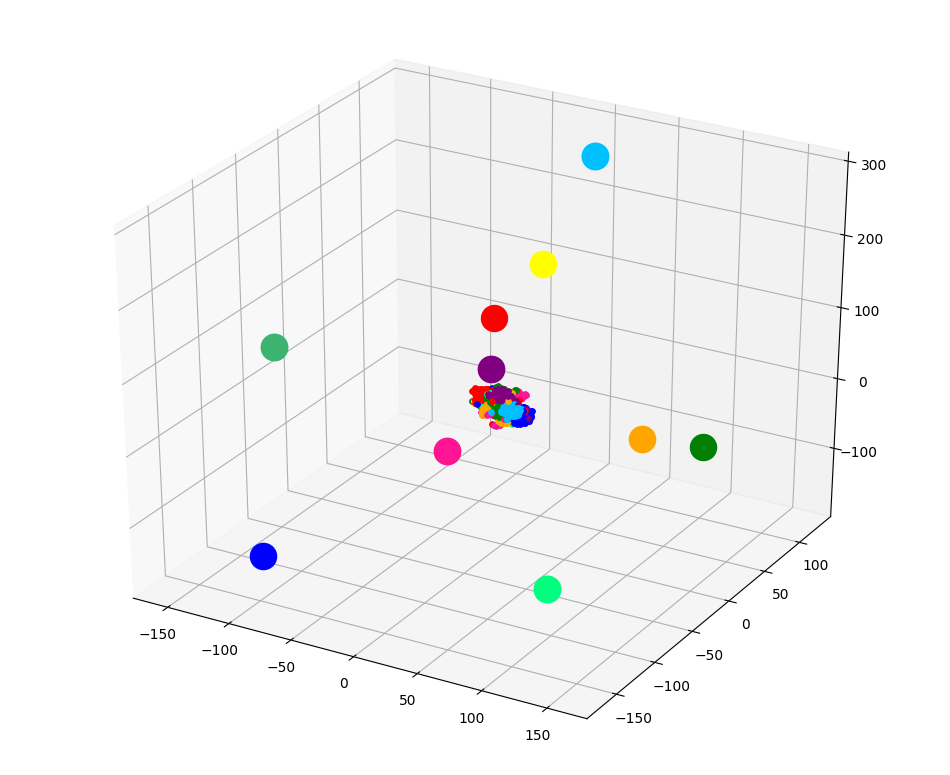

In [ ]:
# Visualize test data with respect to detection results

rainbow_cloud ( tsne_sample, test_affiliations, test_centroids_tsne )

In [ ]:
# now, let's convert into pca.

np.shape(lines)

(20000, 784)

In [ ]:
def demean_dataset ( inset_flattened ):
    # find mean of flattened trainset
    #1. Transpose so that each row becomes an attribute
    inset_flattened_transposed = inset_flattened.T
    print('transposed the flattened training dataset:', np.shape(inset_flattened_transposed), type(inset_flattened_transposed))
    
    #2. Find mean of each row (attribute), save it as the mean image vector
    print('computing mean vector...')
    miu = np.array( [np.mean(attribute) for attribute in inset_flattened_transposed ] )
    print('done', np.shape(miu), '\n')    
    
    print('vstacking mean vector...')
    N = np.shape(inset_flattened)[0]
    miu_instacked = np.vstack([miu]*N)
    print('done', np.shape(miu_instacked), '\n')    
    
    # demean every image in training dataset
    print('demeaning dataset...')
    inset_demeaned = inset_flattened - miu_instacked
    print('dataset demeaned successfully:', np.shape(inset_demeaned))
    
    return inset_demeaned

In [ ]:
lines_demeaned = demean_dataset (lines)

In [ ]:
def pca( inset,N,K):
  inset_flattened_demeaned_sample =  inset[:N]
  np.shape(inset_flattened_demeaned_sample)

  A = inset_flattened_demeaned_sample.T
  np.shape(A)

  print('calculating covfefe...')
  covmat = np.dot(A.T,A)

  print('done:', np.shape(covmat))

  # from covariance matrix, get U_12 of 12 eigenvectors

  import numpy.linalg as LA
  print('computing eigenvalues and eigenvectors...')
  eigenvalues, eigenvectors = LA.eigh(covmat)

  print(eigenvalues)
  np.shape(eigenvalues)
  print(eigenvectors)
  np.shape(eigenvectors)

  # compute list of K largest eigenvalues
  max_12_values = Nmaxelements (list(eigenvalues), K)
  np.shape(max_12_values)

  # compute their positions in the eigenvalues list
  max_12_indexes = []
  for max_value in max_12_values:
      max_eigen_index = list(eigenvalues).index(max_value)
      max_12_indexes.append( max_eigen_index )
  max_12_indexes

  # get list of 12 largest eigenvalues
  max_12_eigenvectors = []

  for max_index in max_12_indexes:
      max_12_eigenvectors.append(eigenvectors[max_index])
  max_12_eigenvectors = np.array (max_12_eigenvectors)
  np.shape(max_12_eigenvectors)

  U = max_12_eigenvectors.T
  np.shape(U)

  print(np.shape(U))
  print(np.shape(A))

  # multiply U and A in compatible order

  eigenfaces = np.matmul ( U.T, A.T )

  np.shape(eigenfaces)
  # same as U.T from slide 36

  # bring ONE training face down into the eigen dimension 
  print(np.shape(A))

  # multiply eignfaces and A
  inset_projected = np.matmul ( eigenfaces, A )
  print(np.shape(inset_projected))
  
  return inset_projected

In [ ]:
# take 3000 samples from lines and project into 12-dimensions

